In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x_data = np.linspace(0.0,10.0,1000000) 

In [4]:
noise = np.random.randn(1000000)

In [5]:
#y = mx+b
# b = 5

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [8]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [11]:
y_df.head()

,Y
0,5.363619
1,5.408731
2,6.979967
3,6.268827
4,5.740330


In [12]:
my_data = pd.concat([x_df,y_df],axis=1)

In [13]:
my_data

,X Data,Y
0,0.00000,5.363619
1,0.00001,5.408731
2,0.00002,6.979967
3,0.00003,6.268827
4,0.00004,5.740330
...,...,...
999995,9.99996,10.538001
999996,9.99997,9.487474
999997,9.99998,9.490788
999998,9.99999,11.178907


<AxesSubplot:xlabel='X Data', ylabel='Y'>

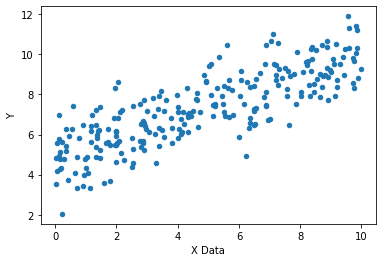

In [14]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [15]:
batch_size = 8

In [21]:
np.random.randn(2)

array([-1.21060503,  1.43629501])

In [22]:
m = tf.Variable(0.31)
b = tf.Variable(0.12)

In [23]:
tf.compat.v1.disable_eager_execution()

In [24]:
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [25]:
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [26]:
y_model = xph*m + b

In [27]:
error = tf.math.reduce_sum(tf.square(yph-y_model))

In [30]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(error)

In [31]:
init = tf.compat.v1.global_variables_initializer()

In [33]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph : x_data[rand_ind],yph : y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
    
    model_m ,model_b = sess.run([m,b])

In [34]:
model_m

0.5073392

In [35]:
model_b

4.906085

In [36]:
y_hat = x_data*model_m + model_b

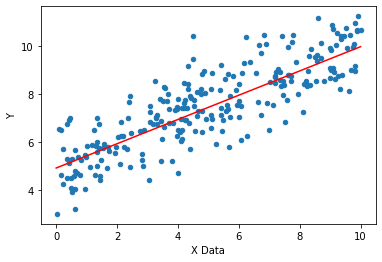

In [37]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

ESTIMATOR API

In [51]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [53]:
esimator = tf.estimator.LinearRegressor(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\PRAMEE~1\\AppData\\Local\\Temp\\tmp5vilaqqu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [56]:
X_train.shape

(700000,)

In [59]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [60]:
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':X_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [61]:
eval_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':X_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [63]:
esimator.train(input_fn = input_func,steps = 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead

In [65]:
train_metrics = esimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-01T12:36:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\PRAMEE~1\AppData\Local\Temp\tmp5vilaqqu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/10

In [67]:
eval_metrics = esimator.evaluate(input_fn=eval_func,steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-01T12:37:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\PRAMEE~1\AppData\Local\Temp\tmp5vilaqqu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/10

In [68]:
print(train_metrics)

{'average_loss': 1.0630555, 'label/mean': 7.500058, 'loss': 1.0630555, 'prediction/mean': 7.4082046, 'global_step': 1000}


In [69]:
print(eval_metrics)

{'average_loss': 1.0648115, 'label/mean': 7.5039344, 'loss': 1.0648115, 'prediction/mean': 7.386879, 'global_step': 1000}


In [70]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [73]:
list(esimator.predict(input_fn = input_fn_predict))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\PRAMEE~1\AppData\Local\Temp\tmp5vilaqqu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4557385], dtype=float32)},
 {'predictions': array([5.111547], dtype=float32)},
 {'predictions': array([5.7673554], dtype=float32)},
 {'predictions': array([6.423164], dtype=float32)},
 {'predictions': array([7.078973], dtype=float32)},
 {'predictions': array([7.7347803], dtype=float32)},
 {'predictions': array([8.390589], dtype=float32)},
 {'predictions': array([9.046398], dtype=float32)},
 {'predictions': array([9.702207], dtype=float32)},
 {'predictions': array([10.358015], dtype=float32)}]

In [76]:
predictions = []
for pred in esimator.predict(input_fn = input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\PRAMEE~1\AppData\Local\Temp\tmp5vilaqqu\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [77]:
predictions

[array([4.4557385], dtype=float32),
 array([5.111547], dtype=float32),
 array([5.7673554], dtype=float32),
 array([6.423164], dtype=float32),
 array([7.078973], dtype=float32),
 array([7.7347803], dtype=float32),
 array([8.390589], dtype=float32),
 array([9.046398], dtype=float32),
 array([9.702207], dtype=float32),
 array([10.358015], dtype=float32)]

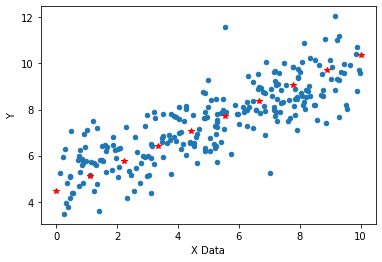

In [81]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')